In [1]:
from measure_syn_tau import *
from rockpool.devices.dynapse import *

In [2]:
sim_board = get_board(AMPABase(SOIF_LEAK_N=(1,50)))

NameError: name 'get_board' is not defined

In [ ]:
se1 = DynapSE1Jax((20,5), sim_board, w_rec=np.zeros((5,5,4)), dt=1e-3)

NameError: name 'DynapSE1Jax' is not defined

In [ ]:
sim_board.bit_mask = np.array([0b0000, 0b0000, 0b0000, 0b0001])
CAM_in = np.zeros((5,5,4))
CAM_in[0][0][3] = 1
CAM_in[1][1][3] = 1
CAM_in[2][2][3] = 1
CAM_in[3][3][3] = 1
CAM_in[4][4][3] = 1
w_in = sim_board.weight_matrix(CAM_in)
# w_in = sim_board.weight_matrix(np.ones((5,5,4)))
fpga = DynapSEFPGA((5,20), sim_board, w_in = w_in)
w_in



DeviceArray([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               4.9159473e-07],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00]],

             [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               4.9159473e-07],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00],
              [0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+00]],

             [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
               0.0000000e+

In [ ]:
modSE = TimedModuleWrapper(Sequential(fpga, se1), dt=se1.dt,)

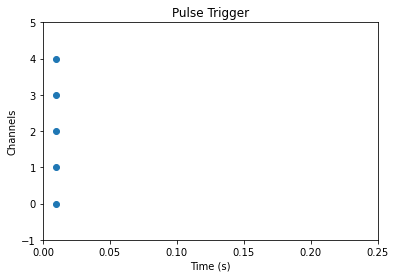

In [ ]:
input_ts = custom_spike_train(
    times = [0.01, 0.01, 0.01, 0.01, 0.01],
    channels = [0, 1, 2, 3, 4],
    duration = 0.250,
    name = "Pulse Trigger",
)

input_ts.plot();

In [ ]:
out_spikes, new_state, record_dict = modSE(input_ts, record=True)

In [ ]:
rd = record_dict["1_DynapSE1Jax"]

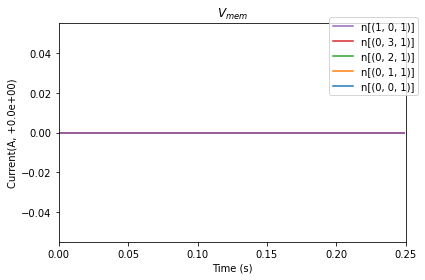

In [ ]:
Figure.plot_Ix(rd["Vmem"], name="$V_{mem}$", idx_map=se1.idx_map);

In [ ]:
import jax
j_modSE =jax.jit(modSE.module)

In [ ]:
out_spikes, new_state, record_dict = j_modSE(input_ts.raster(1e-3))

In [ ]:
_params = {
    "Itau_syn": sim_board.Itau_syn,
    "f_gain_syn": sim_board.f_gain_syn,
    "Itau_ahp": sim_board.Itau_ahp,
    "f_gain_ahp": sim_board.f_gain_ahp,
    "Iw_ahp": sim_board.Iw_ahp,
    "Itau_mem": sim_board.Itau_mem,
    "Itau2_mem": sim_board.Itau2_mem,
    "f_gain_mem": sim_board.f_gain_mem,
    "Idc": sim_board.Idc,
    "If_nmda": sim_board.If_nmda,
    "Iref": sim_board.Iref,
    "Ipulse": sim_board.Ipulse,
    "Ispkthr": sim_board.Ispkthr,
}


In [ ]:
key = rand.PRNGKey(0)
md = MismatchDevice(key, **_params)

In [ ]:
md.params
# md.mm_Iw_ahp


['Itau_syn',
 'f_gain_syn',
 'Itau_ahp',
 'f_gain_ahp',
 'Iw_ahp',
 'Itau_mem',
 'Itau2_mem',
 'f_gain_mem',
 'Idc',
 'If_nmda',
 'Iref',
 'Ipulse',
 'Ispkthr']

In [ ]:
md.Itau_syn

DeviceArray([[8.8652479e-12, 8.6879427e-11, 8.8652479e-12, 1.0046859e-10],
             [8.8652479e-12, 8.6879427e-11, 8.8652479e-12, 5.1244613e-11],
             [8.8652479e-12, 8.6879427e-11, 8.8652479e-12, 3.3937821e-11],
             [8.8652479e-12, 8.6879427e-11, 8.8652479e-12, 2.6117625e-11],
             [8.8652479e-12, 8.6879427e-11, 8.8652479e-12, 2.0736874e-11]],            dtype=float32)

In [ ]:
md.mm_Itau_syn

DeviceArray([[ 0.02409321,  0.00183803, -0.03660947,  0.00908429],
             [ 0.0097414 , -0.02229522, -0.00578669, -0.01114686],
             [-0.00121222, -0.00821408, -0.03680379, -0.05553284],
             [-0.01207715,  0.00777755,  0.02210908, -0.01715741],
             [ 0.04032115, -0.00218733, -0.05503287,  0.00415209]],            dtype=float32)

In [ ]:
md.effective("Itau_syn")

DeviceArray([[9.0788401e-12, 8.7039112e-11, 8.5406959e-12, 1.0138128e-10],
             [8.9516077e-12, 8.4942428e-11, 8.8139478e-12, 5.0673396e-11],
             [8.8545013e-12, 8.6165790e-11, 8.5389733e-12, 3.2053159e-11],
             [8.7581808e-12, 8.7555137e-11, 9.0612500e-12, 2.5669515e-11],
             [9.2227051e-12, 8.6689392e-11, 8.3773682e-12, 2.0822975e-11]],            dtype=float32)

In [ ]:
type(md.get_effective(md.Itau_syn, md.mm_Itau_syn))

jaxlib.xla_extension.DeviceArray